# Clustering Assignement 7

In [1]:
import os
os.listdir()


['.ipynb_checkpoints',
 'Clustering.ipynb',
 'crime_data.csv',
 'data.csv',
 'EastWestAirlines.xlsx',
 'ProblemSatement(crime_data).txt',
 'Problem_Statement(Airlines).txt']

In [2]:
problem1 = open('ProblemSatement(crime_data).txt', 'r')
print('\n\n-------------Problem Statement1------------\n\n')
problem1.read()




-------------Problem Statement1------------




'Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.\n\nData Description:\nMurder -- Muder rates in different places of United States\nAssualt- Assualt rate in different places of United States\nUrbanPop - urban population in different places of United States\nRape - Rape rate in different places of United States\n'

In [3]:
problem1.close()

In [55]:
!pip install yellowbrick


     -------------------------------------- 274.2/274.2 kB 2.4 MB/s eta 0:00:00


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.cluster.hierarchy as sch

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer


import warnings
warnings.filterwarnings('ignore')

In [18]:
# 1. Load data set

data = pd.read_csv("crime_data.csv")
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [19]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


### check for missing values


In [21]:
data.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

##  Normalizing the data for clustering

In [22]:
# function for normalizing the data

def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
df_norm = norm_func(data.iloc[:,1:])
print(df_norm)

      Murder   Assault  UrbanPop      Rape
0   0.746988  0.654110  0.440678  0.359173
1   0.554217  0.746575  0.271186  0.961240
2   0.439759  0.852740  0.813559  0.612403
3   0.481928  0.496575  0.305085  0.315245
4   0.493976  0.791096  1.000000  0.860465
5   0.427711  0.544521  0.779661  0.811370
6   0.150602  0.222603  0.762712  0.098191
7   0.307229  0.660959  0.677966  0.219638
8   0.879518  0.993151  0.813559  0.635659
9   1.000000  0.568493  0.474576  0.478036
10  0.271084  0.003425  0.864407  0.333333
11  0.108434  0.256849  0.372881  0.178295
12  0.578313  0.698630  0.864407  0.431525
13  0.385542  0.232877  0.559322  0.354005
14  0.084337  0.037671  0.423729  0.103359
15  0.313253  0.239726  0.576271  0.276486
16  0.536145  0.219178  0.338983  0.232558
17  0.879518  0.698630  0.576271  0.385013
18  0.078313  0.130137  0.322034  0.012920
19  0.632530  0.873288  0.593220  0.529716
20  0.216867  0.356164  0.898305  0.232558
21  0.680723  0.719178  0.711864  0.718346
22  0.11445

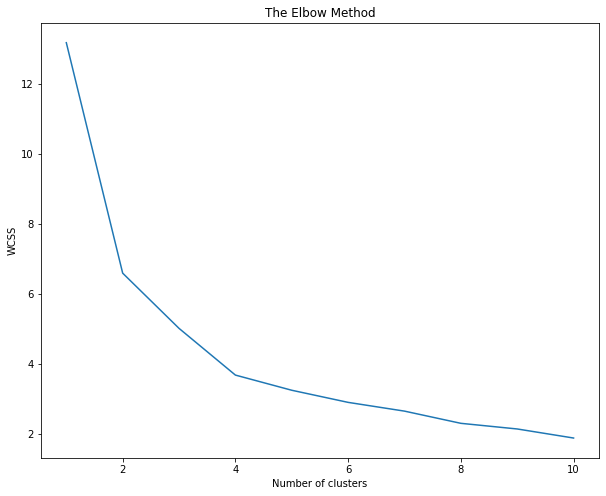

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_norm)

y_kmeans

array([2, 1, 1, 2, 1, 1, 3, 3, 1, 2, 3, 0, 1, 3, 0, 3, 0, 2, 0, 1, 3, 1,
       0, 2, 3, 0, 0, 1, 0, 3, 1, 1, 2, 0, 3, 3, 3, 3, 3, 2, 0, 2, 1, 3,
       0, 3, 3, 0, 0, 3])

In [27]:
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1

# New list called cluster
cluster = list(y_kmeans1)
# Adding cluster to our data set
data['cluster'] = cluster

In [28]:
#Mean of clusters 1 to 4
kmeans_mean_cluster = pd.DataFrame(round(data.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Murder,Assault,UrbanPop,Rape
cluster,,,,
1,3.6,78.5,52.1,12.2
2,11.0,264.0,76.5,33.6
3,13.9,243.6,53.8,21.4
4,5.9,141.2,73.6,19.3


<AxesSubplot:xlabel='Murder', ylabel='Assault'>

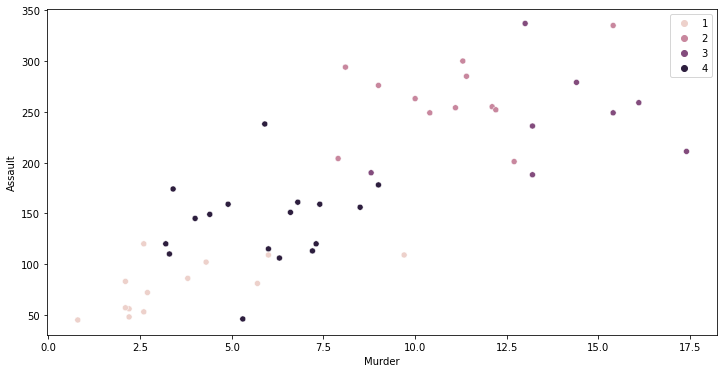

In [29]:
# import seaborn as sns

plt.figure(figsize=(12,6))
sns.scatterplot(x=data['Murder'], y = data['Assault'],hue=y_kmeans1)

#### The above scatter shows a distribution of how the states are scattered and clusters are visible based on Murders and Assaults. And there is a positive correlation between occurrence of Murder and Assault in different states.

In [30]:
from IPython.display import HTML
import base64

df = data
def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(df)

## Insights

- Cluster 3 - south western states (however, definition changes for different sources) maxes out in three (Assault, Urbanpop, Rape) out of four crimes.

- Cluster 4 stands out for minimum crime rate as the means of 3 crimes are least relative to other crimes

- Coincidentally, most of the southern region states belong to cluster 2 where Murders seems to be popular.

- The southern states in cluster 4 have more number of average arrests/ 100,000 persons in all the three crime categories than states (half of mid-western states) in cluster 2 in spite of the average Urbanpop (%) being very close. For causality, more variables are needed apart from the number of arrests to understand the inferences like the above. For instance, it could be the density of people or number of people with a different socio-economic statuses in that state.

## Clustering 2

In [31]:
problem2 = open('Problem_Statement(Airlines).txt','r')

print('\n-----------probmen statement 2-------------\n')
problem2.read()



-----------probmen statement 2-------------



'Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. \nDraw the inferences from the clusters obtained.\n\nData Description:\n \nThe file EastWestAirlinescontains information on passengers who belong to an airlineâ€™s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers\n\nID --Unique ID\n\nBalance--Number of miles eligible for award travel\n\nQual_mile--Number of miles counted as qualifying for Topflight status\n\ncc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:\ncc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:\ncc3_miles -- Number of miles earned with Small Bus

In [32]:
data = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')

In [33]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [34]:
# column rename

data = data.rename(columns={'ID#':'ID','Award?':'Award'})
data.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


### Data preprocessing

In [35]:
# dropping the non relevant columns award and id

dataset1 = data.drop(['ID','Award'],axis=1)
dataset1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


In [36]:
#lets standedize the data

std_df = StandardScaler().fit_transform(dataset1)
std_df.shape

(3999, 10)

In [37]:
# lets scale the data

minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(dataset1)
minmax_df.shape

(3999, 10)

In [38]:
# lets do the PCA to reduce the features and keep only the important features

# applying PCA on std_df

# we are considering 95% variance in n_components to not loose any data.

from sklearn.decomposition import PCA
pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df= pca_std.fit_transform(std_df)

In [39]:
# eigenvalues..

print(pca_std.singular_values_)

[110.44189995  83.11377294  64.82616793  63.48944763  61.96605949
  60.17942085  51.82140955  38.09870033]


In [40]:
# eigenvalues..

print(pca_std.singular_values_)

[110.44189995  83.11377294  64.82616793  63.48944763  61.96605949
  60.17942085  51.82140955  38.09870033]


In [41]:
# Cummulative variance ratio..

# this will give an idea of, at how many no. of PCAs, the cummulative addition of
#........variance will give much information..

cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([30.50115845, 47.7752251 , 58.28393239, 68.36372724, 77.96560903,
       87.02177981, 93.73710486, 97.3667897 ])

Conclusion:

* by applying PCA on standardized data with 95% variance it gives 8 PCA components.

In [42]:
# running PCA on MinMaxscalar data

# applying PCA on minmax_df

from sklearn.decomposition import PCA

pca_minmax =  PCA(random_state=10, n_components=0.95)
pca_minmax_df = pca_minmax.fit_transform(minmax_df)

In [43]:
# eigenvalues..

print(pca_minmax.singular_values_)

[23.30644253 14.98078096  6.73641543  4.71018421  4.35528647]


In [44]:
# variance containing in each formed PCA

print(pca_minmax.explained_variance_ratio_*100)

[60.47067269 24.98398618  5.05185116  2.46983879  2.11167109]


Conclusion:

* By applying PCA on MinMaxscalr transformation data gives 5 PCA components.

# Kmeans Clustering

model1


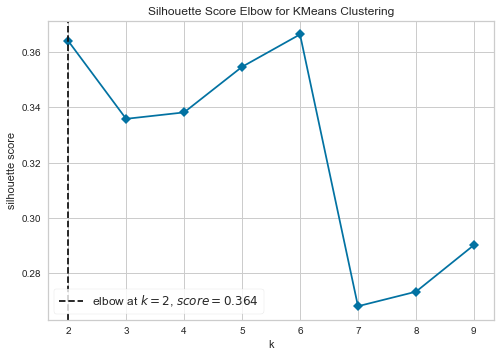

model2


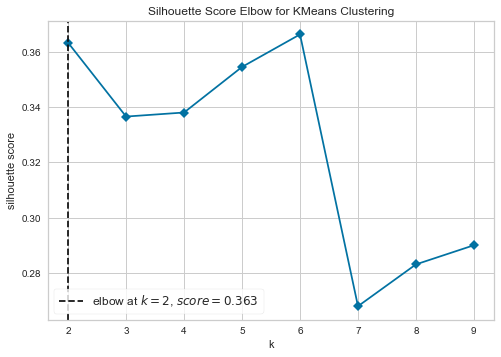

In [58]:
# 1. How many number of clusters? n_clusters?

# Since true labels are not known..we will Silhouette Coefficient (Clustering performance evaluation)
# knee Elbow graph method

# Import the  KElbowVisualizer method
from sklearn.cluster import KMeans
#from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model1 = KMeans(random_state=0, )
model2 = KMeans(random_state=10,  max_iter=500, n_init=20,)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer1 = KElbowVisualizer(model1, k=(2,10), metric='silhouette', timings=False)
visualizer2 = KElbowVisualizer(model2, k=(2,10), metric='silhouette', timings=False)

# Fit the data and visualize
print('model1')
visualizer1.fit(pca_std_df)    
visualizer1.poof()
plt.show()

print('model2')
visualizer2.fit(pca_std_df)    
visualizer2.poof()
plt.show()